# **Frosthack 2k24**

## **Theme: Unleashing the Power of Generative AI**

### **Problem Statement**
**Guardians of Truth** : The spread of misinformation through deepfakes and fake news threatens trust online. Develop AI powered solutions to combat these issues

### **Solution**
In the era of rampant deepfakes and misinformation, Project Bloodline confronts these rising threats. Our platform safeguards users from deceptive content while providing reliable news updates, empowering them to stay informed and resist manipulation. 

**Key Features**

- **Guardian (Deepfake Detection):**  Advanced AI model that analyzes images to expose deepfakes, protecting users from manipulated media.
- **TruthGuard (Fake News Detection):** Combats the spread of misinformation by pinpointing fake news articles, promoting truth and transparency.
- **News Update (News-Bot):**  Delivers trustworthy news updates from reputable sources, enabling users to stay informed about global events.

**Team: The BLOODLINE** 🔥🔥

Team Members:
1) Toshan Gupta
2) Naman Singhania
3) Mayank Goel
4) Vishnu


# **Testing Deepfake Images Model**

## **Architecture of model:**
1) Image input by user
2) Prediction in terms of real and fake base on our model

    Importing all the libraries

In [1]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
#Importing the libraries
import torch
import cv2
import os
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

# **Importing CLIP Model from OpenAI Github Repository**

Repo Link:https://github.com/openai/CLIP.git

In [2]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
#Install this repo
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/openai/CLIP.git to c:\users\tosha\appdata\local\temp\pip-req-build-w_hzsk7u
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\tosha\AppData\Local\Temp\pip-req-build-w_hzsk7u'


**Finding "ViT-L/14" model from CLIP**

In [3]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
import clip
for i in clip.available_models():
  if i=="ViT-L/14":
      print("Model Found")
      break
  else:
    print("Searching...")
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

Searching...
Searching...
Searching...
Searching...
Searching...
Searching...
Searching...
Model Found


    Loading the model imported above with all its parameters

In [4]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
model, preprocess_model = clip.load("ViT-L/14")
model.eval()
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
    (ln_pre): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
          )
          (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=1024, out_features=4096, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=4096, out_features=1024, bias=True)
          )
          (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)


    Loading the trained model

In [15]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
os.chdir("c:\\Users\\tosha\\Guardians-of-Truth\\saved_models")
model_lc = load_model("model_lc.h5")
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

# Function to process the image and giving prediction results
1) Loading image
2) Converting into array form
3) Applying preprocess function to preprocess image
4) Encoding of image into feature vectors
5) Predicting class of image
6) Convert the prediction to a string based on prob

In [19]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
def process_image(image_data):
    #Loading image
    img = cv2.imread(image_data)

    #Converting into array form
    img = Image.fromarray(img)

    #Applying preprocess function to preprocess image
    img = preprocess_model(img)

    #Encoding of image into feature vectors
    img_batch = torch.unsqueeze(img, 0)
    with torch.no_grad():
        img_encoding = model.encode_image(img_batch).float()
    img_encoding_np = img_encoding.cpu().numpy()

    #Predicting class of image
    prediction = model_lc.predict(img_encoding_np)
    print(prediction)
    # Convert the prediction to a string based on prob
    if float(prediction[0][0])<0.5:
        out="REAL"
    else:
        out="FAKE"
    return out
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

Testing model on deepfakes of Tom Cruise which went viral in 2021

In [21]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
#Calling the above function on Tom Cruise deepfake and real images
os.chdir("c:\\Users\\tosha\\Guardians-of-Truth\\Test_ml_models")
out1=process_image("img1.jpg")
out2=process_image("img2.jpg")
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

1/1 [==============================] - 0s 14ms/step
[[0.00732869]]
1/1 [==============================] - 0s 15ms/step
[[0.9255545]]


Plotting the tested images based on the labels given by model

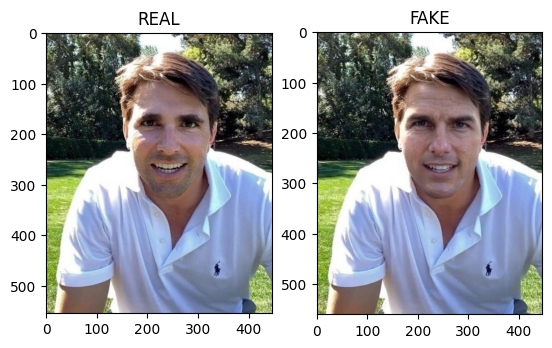

In [23]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
#Reading the iamges
img1=cv2.imread("img1.jpg")
img2=cv2.imread("img2.jpg")
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>
#Plotting the images
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.title(str(out1))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.title(str(out2))
plt.show()
#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

# Integrating model to our website using fastapi
1) Importing Libraries
2) Setting up of app
3) Adding middleware between our website and fastapi
4) calling of process_image function to provide output
5) Running of app

In [ ]:
#<-------------------------------------------------------------------------------------------------------------------------------------------------------------->
#1) Importing Libraries
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import JSONResponse
from fastapi.middleware.cors import CORSMiddleware

#<--------------------------------------------------------------------------------------------------------------------------------------------------------------->
#2) Setting up of app
app = FastAPI()
origins = [
    "http://localhost:3000",  # Add other allowed origins as needed
]

#<-------------------------------------------------------------------------------------------------------------------------------------------------------------->
#3) Adding middleware between our website and fastapi
app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

#<-------------------------------------------------------------------------------------------------------------------------------------------------------------->
#4) calling process_image function to provide output
@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    filename = 'temp.png'
    with open(filename, 'wb') as f:
        f.write(await file.read())
    prediction = process_image(filename)
    os.remove(filename)
    print(prediction)
    return JSONResponse(content={"prediction": prediction}, media_type="application/json")

#<-------------------------------------------------------------------------------------------------------------------------------------------------------------->
#5) Running of app
import asyncio
import uvicorn

if __name__=="__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()

#<-------------------------------------------------------------------------------------------------------------------------------------------------------------->

INFO:     Started server process [28944]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Model Found
1/1 [==============================] - 0s 43ms/step
REAL
INFO:     127.0.0.1:61946 - "POST /predict HTTP/1.1" 200 OK
Model Found
1/1 [==============================] - 0s 45ms/step
FAKE
INFO:     127.0.0.1:62311 - "POST /predict HTTP/1.1" 200 OK
Model Found
1/1 [==============================] - 0s 58ms/step
FAKE
INFO:     127.0.0.1:62314 - "POST /predict HTTP/1.1" 200 OK
Model Found
1/1 [==============================] - 0s 54ms/step
FAKE
INFO:     127.0.0.1:62444 - "POST /predict HTTP/1.1" 200 OK
Model Found
1/1 [==============================] - 0s 177ms/step
REAL
INFO:     127.0.0.1:61098 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [28944]
